<a href="https://colab.research.google.com/github/Seize-the-Youth/hg_MLDL/blob/main/1.%203.%20%EB%A7%88%EC%BC%93%EA%B3%BC%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***마켓과 머신러닝***

## 생선 분류 문제

도미와 빙어의 이진 분류 수행 (binary classification)

### 도미 데이터 준비하기

도미의 길이와 무게를 파이썬 리스트로 만든다.
길이와 무게 같은 특징을 특성(feature)이라 칭한다. 

In [ ]:
# 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

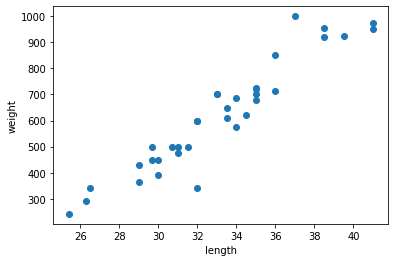

In [ ]:
# 패키지 임포트
# matplotlib의 pyplot 함수를 plt로 줄여서 사용
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')  # x 축은 길이
plt.ylabel('weight')  # y 축은 무게
plt.show() # 화면에 그래프 출력

### 빙어 데이터 준비하기

도미 데이터와 같은 방식으로 빙어 데이터를 준비한다. (14마리)

In [ ]:
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

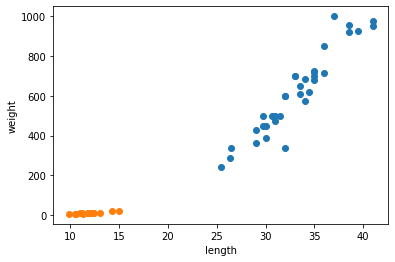

In [ ]:
# 2개의 산점도를 한 그래프로 그리기
plt.scatter(bream_length, bream_weight) # 도미 - 파란 점
plt.scatter(smelt_length, smelt_weight) # 빙어 - 주황 점

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

In [ ]:
# 도미와 빙어 데이터를 하나의 리스트로 만들기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# 파이썬의 zip() 함수와 리스트 내포(list comprehension) 구문을 사용
# 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트 만들기
fish_data = [[l, w] for l, w in zip(length, weight)]

# 리스트 출력 후 확인
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 도미 (찾으려는 대상, 1) / 빙어 (0)
fish_target = [1]*35 + [0]*14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# k-최근접 이웃 알고리즘을 구현한 KNeighborsClassifier 클래스 임포트

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 클래스 객체 만들기
# kn 을 '객체' 또는 '머신러닝 모델'이라 부름

kn = KNeighborsClassifier()

In [ ]:
# 객체에 fish_data 와 fish_target 을 전달하여 학습 (훈련)

kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [ ]:
# 객체 평가

kn.score(fish_data, fish_target)

1.0

### k-최근접 이웃 알고리즘

다섯 개의 주변 샘플을 보고 그 주변 샘플의 class 중 가장 많은 클래스를 정답으로 삼는다. (단순하다)

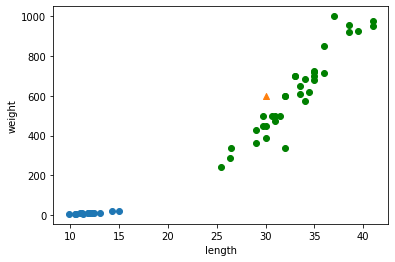

In [ ]:
# kn 모델을 새로운 데이터에 적용
# 길이가 30이고 무게가 600인 친구. 도미겠지?

plt.scatter(bream_length, bream_weight, color='g')
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30, 600, marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [ ]:
# predict method 로 예측. 샘플 데이터를 2차원 배열 형태로 전달

kn.predict([[30, 600]])

array([1])

In [ ]:
# _fix_X 의 속성에 fish_data 를 모두 가지고 있음.

print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# _y 의 속성에 fish_target 을 모두 가지고 있음.

print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# kn49 객체 만들기 (참고 데이터를 49개로 한 모델)

kn49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
# 전체 샘플의 다수가 도미이기 때문에 어떤 데이터를 넣어도 도미로 예측할 것이다.

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
# 49개 중에 35개가 도미. 정확도를 계산하면 score() 메서드와 값이 같다.

print(35/49)

0.7142857142857143


### 확인 문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # 최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
